In [1]:
import numpy as np
import matplotlib.pyplot as plt
import run_simple_energy_loss

#### Next we will load the simulation. 
 - It will take a numpy array with dimension M x N as input.
    - M number of design points
    - N number of model parameters of the model
 - It will return a M x P numpy array.
     - M number of design points
     - P number of Momentem bins

In [2]:
simulation=run_simple_energy_loss.run_simulation

#### Make a design matrix

There are 4 parameters currently taken as model parameters. 
 - Initialization
     - T0_in_GeV (deafult value 0.3)
     - tau0 (deafult value 0.2)
     - Tf_in_GeV (deafult value 0.15)
 - Parton Energy loss rates
     - alpha_s (deafult value 0.1)

In [3]:
hbarc=0.1973
n_design = 5

In [4]:
# design for alpha_s parameter
T0_in_fm = np.full((n_design,1), 0.3)
tau0 = np.full((n_design,1), 0.2)
Tf_in_fm = np.full((n_design,1), 0.15)

# We will only consider the change in modle parameter for now
alpha_s = np.linspace(0.01,1,n_design).reshape(-1,1)

#N_f = np.full((n_design,1), 0)
#N_c = np.full((n_design,1), 3)

design = np.vstack([T0_in_fm.T, tau0.T, Tf_in_fm.T, alpha_s.T])

# design matrix has to have M by N shape. Rows should be design points

design = design.T
print(f'Shape of the design is {design.shape}')

Shape of the design is (5, 4)


#### Run simulation for the 20 design points

In [29]:
%%time
observables=simulation(design)

Working on 0/5 designs
Working on 1/5 designs
Working on 2/5 designs
Working on 3/5 designs
Working on 4/5 designs
Shape of the result array is (5, 20)
CPU times: user 10min 3s, sys: 3.18 s, total: 10min 6s
Wall time: 10min 9s


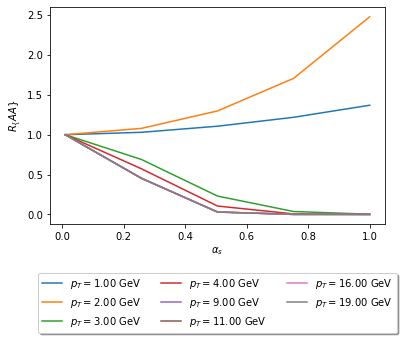

In [7]:
# Plot the observables
show_obs=[0,1,2,3,8,10,15,18]
design_alpha=alpha_s.T
pt_list = np.linspace(1,20,20)
fig, ax = plt.subplots()
for i,pT in enumerate(pt_list):
    if i in show_obs:
        ax.plot(design_alpha.flatten(),observables[:,i], label=r'$p_T =$' +f'{pT:.2f} GeV')

ax.set_xlabel(r'$\alpha_s$')
ax.set_ylabel(r'$R_\{AA\}$')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),shadow=True, ncol=3)